In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'cats_and_dogs/train'
valid_path = 'cats_and_dogs/valid'
test_path = 'cats_and_dogs/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['dog','cat'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)

Found 2023 images belonging to 2 classes.
Found 119 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!= 3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize = figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows,cols,i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i],fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')    

In [5]:
imgs,labels = next(train_batches)

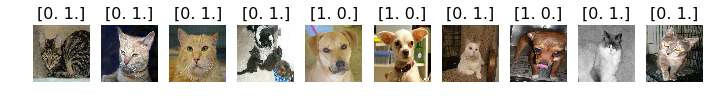

In [6]:
plots(imgs,titles=labels)

In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax')
])

In [8]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 6s - loss: 8.3268 - acc: 0.4750 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 2/5
 - 2s - loss: 9.2679 - acc: 0.4250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 4/5
 - 2s - loss: 5.6413 - acc: 0.6500 - val_loss: 10.0738 - val_acc: 0.3750
Epoch 5/5
 - 2s - loss: 6.8502 - acc: 0.5750 - val_loss: 8.0590 - val_acc: 0.5000


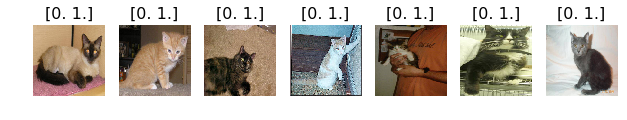

In [10]:
test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [11]:
test_labels=test_labels[:,0]
test_labels

array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)

In [13]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
cm = confusion_matrix(test_labels,predictions[:,0])

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
cm_plot_labels=['cat','dog']

Confusion matrix, without normalization
[[0 7]
 [0 0]]


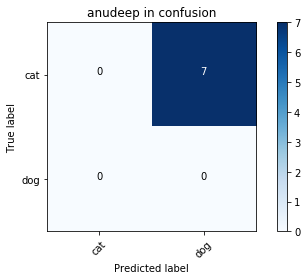

In [17]:
plot_confusion_matrix(cm,cm_plot_labels,title='anudeep in confusion')

In [18]:
vgg16_model = keras.applications.vgg16.VGG16()

In [19]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [20]:
type(vgg16_model)

keras.engine.training.Model

In [21]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [23]:
model.layers.pop()

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [25]:
for layer in model.layers:
    layer.trainable = False

In [26]:
model.add(Dense(2,activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [28]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 25s - loss: 0.6888 - acc: 0.5750 - val_loss: 0.6931 - val_acc: 0.4375
Epoch 2/5
 - 25s - loss: 0.6878 - acc: 0.6250 - val_loss: 0.6858 - val_acc: 0.6875
Epoch 3/5
 - 25s - loss: 0.6841 - acc: 0.6000 - val_loss: 0.6807 - val_acc: 0.7500
Epoch 4/5
 - 27s - loss: 0.6931 - acc: 0.4750 - val_loss: 0.6818 - val_acc: 0.7500
Epoch 5/5
 - 26s - loss: 0.6867 - acc: 0.5250 - val_loss: 0.6903 - val_acc: 0.5625


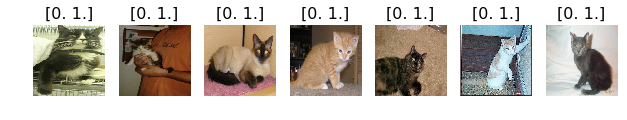

In [30]:
test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [31]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)

In [33]:
cm = confusion_matrix(test_labels,np.round(predictions[:,0]))

Confusion matrix, without normalization
[[6 1]
 [0 0]]


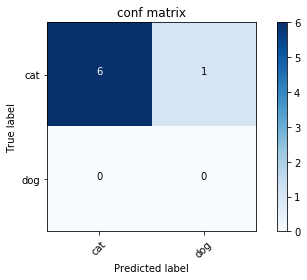

In [34]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='conf matrix')